<a href="https://colab.research.google.com/github/choinkyo/Deep-Learning-and-Neural-Network/blob/master/Recurrent_Neural_Network(RNN)_for_Newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN to Classify Reuters Topics

Train a recurrent neural network to Classify Reuters newswires into 46 Topics.

Dataset of 11,228 newswires from Reuters, labeled over 46 topics. As with the IMDB dataset, each wire is encoded as a sequence of word indexes (same conventions).

In [ ]:
%tensorflow_version 1.14
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

from __future__ import print_function

import numpy as np
import keras
keras.__version__

!pip install numpy==1.16.1

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


## Load Reuters Dataset

First let's load the Reuters dataset. Please refer to [this API page](https://keras.io/datasets/#reuters-newswire-topics-classification) for details on how to load the data.

In [ ]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

max_words = 10000

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words, test_split=0.2)
word_index = reuters.get_word_index(path="reuters_word_index.json")
tf.keras.datasets.reuters.get_word_index(path="reuters_word_index.json")


Loading data...
557056/550378 [==============================] - 0s 1us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

## Task 1: Fully Connected Neural Networks

In this task, we will learn a word embedding layer as well as fully connected layers to classify Reuters newwires. Please refer to the lab code from lesson 4. Watch out the overfitting. 

In [ ]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

In [ ]:
from keras.datasets import reuters
from keras import preprocessing
from keras.preprocessing import sequence
from keras.utils import to_categorical

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

print('Loading data...')
(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

#one hot encode labes
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)

#train test
partial_x_train = input_train
partial_y_train = one_hot_train_labels

#train test
x_test = input_test
y_test = one_hot_test_labels

#to_categorical
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46)

Loading data...
8982 train sequences
2246 test sequences
input_train shape: (8982, 20)
input_test shape: (2246, 20)
y_train shape: (8982,)
y_test shape: (2246,)


In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())

model.add(Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(
    input_train, 
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                7406      
Total params: 87,406
Trainable params: 87,406
Non-trainable params: 0
_________________________________________________________________
Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 2s 274us/step - loss: 3.3709 - acc: 0.3460 - val_loss: 2.6904 - val_acc: 0.3478
Epoch 2/10
7185/7185 [==============================] - 0s 38us/step - loss: 2.3046 - acc: 0.3663 - val_loss: 2.1525 - val_acc: 0.4051
Epoch 3/10
7185/7185 [==============================] - 0s 39

## I get to a validation accuracy of 48% on average.

## Task 2: RNN/LSTM
Now, we have a fully connected neural networks trained for prediction topics in Reuters data. In this task, we will swap out the fully connect layers and replace with a more powerful RNN layers (LSTM, GRU). Try experiment with different RNN layers and see if they can help improve the model performance.

## RNN

In [ ]:
from keras.datasets import reuters
from keras import preprocessing
from keras.preprocessing import sequence
from keras.utils import to_categorical

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 500
batch_size=64

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

print('Loading data...')
(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

#one hot encode labes
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)

#train test
partial_x_train = input_train
partial_y_train = one_hot_train_labels

#train test
x_test = input_test
y_test = one_hot_test_labels

#to_categorical
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46)

Loading data...
8982 train sequences
2246 test sequences
input_train shape: (8982, 500)
input_test shape: (2246, 500)
y_train shape: (8982,)
y_test shape: (2246,)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
from keras.utils import to_categorical                        

model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dropout(.5))
model.add(Dense(46, activation='softmax'))


model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 659,502
Trainable params: 659,502
Non-trainable params: 0
_________________________________________________________________
Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 31s 4ms/st

## I get to a validation accuracy of 51% on average.

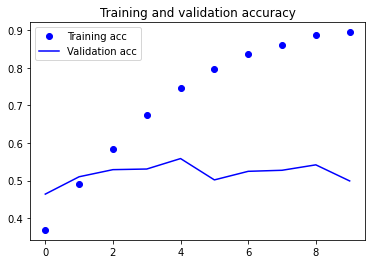

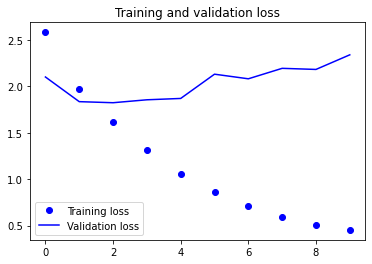

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### LSTM

In [ ]:
from keras.layers import Dense
from keras.layers import LSTM


model = Sequential()
model.add(Embedding(max_features, 64))
model.add(LSTM(64))
model.add(Dense(46, activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 46)                2990      
Total params: 676,014
Trainable params: 676,014
Non-trainable params: 0
_________________________________________________________________
Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 35s 5ms/step - loss: 2.3077 - acc: 0.4184 - val_loss: 2.0829 - val_acc: 0.4775
Epoch 2/10
7185/7185 [==============================] - 34s 5ms/step - loss: 1.9271 - acc: 0.4903 - val_loss: 1.8324 - val_acc: 0.4897
Epoch 3/10
7185/7185 [==============================] - 35s 

## I get to a validation accuracy of 60% on average

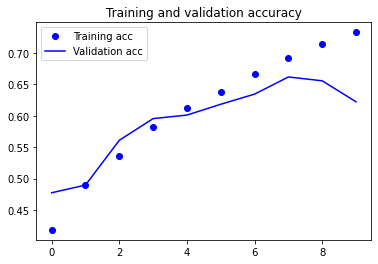

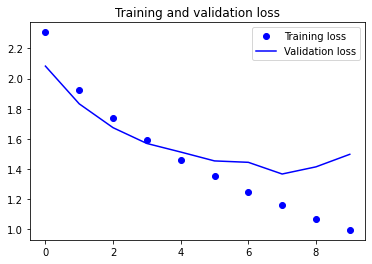

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 3: Use a Pre-trained Word Embedding

In this task, instead of learning the word embedding layer from scratch, we apply a pre-trained word embedding layer and only use the classification base for reuters data. Please refer to the [API](https://keras.io/examples/pretrained_word_embeddings/) for different pre-trained word embedding.

Does the pre-trained word embedding help improve the model prediction?


In [ ]:
# TODO
import os
import sys
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

# build index mapping words in the embeddings set to their embedding vector

print('Indexing word vectors.')

embeddings_index = {}
DIR = ""
with open(os.path.join(DIR, 'glove.6B.100d.txt')) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

--2020-05-09 23:39:47--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-05-09 23:39:47--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-05-09 23:39:48--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
# prepare embedding matrix

EMBEDDING_DIM = 100
MAX_NUM_WORDS = 10000

num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((MAX_NUM_WORDS, EMBEDDING_DIM))

for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
MAX_SEQUENCE_LENGTH = 500

embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

print('Training model.')

Training model.


In [ ]:
# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(46, activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

model.fit(
          partial_x_train, 
          partial_y_train,
          batch_size=128,
          epochs=10,
          validation_split=0.2
)

Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 6s 766us/step - loss: 2.2178 - acc: 0.4168 - val_loss: 2.0059 - val_acc: 0.4090
Epoch 2/10
7185/7185 [==============================] - 1s 81us/step - loss: 1.9117 - acc: 0.4850 - val_loss: 1.9274 - val_acc: 0.4858
Epoch 3/10
7185/7185 [==============================] - 1s 82us/step - loss: 1.7976 - acc: 0.5283 - val_loss: 1.9751 - val_acc: 0.5025
Epoch 4/10
7185/7185 [==============================] - 1s 81us/step - loss: 1.6911 - acc: 0.5594 - val_loss: 2.0253 - val_acc: 0.4814
Epoch 5/10
7185/7185 [==============================] - 1s 81us/step - loss: 1.5764 - acc: 0.5915 - val_loss: 1.6894 - val_acc: 0.5782
Epoch 6/10
7185/7185 [==============================] - 1s 82us/step - loss: 1.4840 - acc: 0.6177 - val_loss: 2.1634 - val_acc: 0.4502
Epoch 7/10
7185/7185 [==============================] - 1s 82us/step - loss: 1.3830 - acc: 0.6454 - val_loss: 2.5564 - val_acc: 0.4446
Epoch 

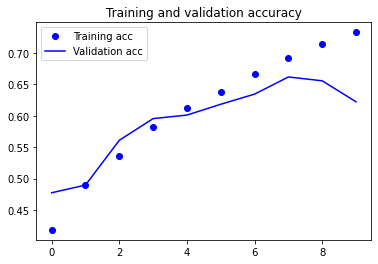

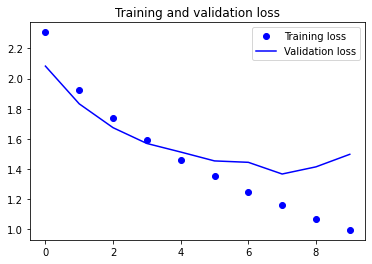

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()